#Training an image classifier
We will do the following steps in order:

Load and normalize the CIFAR10 training and test datasets using torchvision

Define a Convolutional Neural Network

Define a loss function

Train the network on the training data

Test the network on the test data

***Load and normalize CIFAR10****

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.

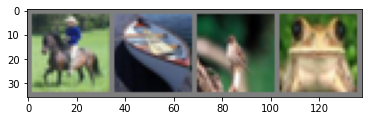

horse ship  bird  frog 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Define a Convolutional Neural Network

modify it to take 3-channel images

In [ ]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_1 = Net()
net_1 = net_1.to ('cuda')


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_1.parameters(), lr=0.001, momentum=0.9)



all_acc_1 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    train_acc = []
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')

        optimizer.zero_grad()

        outputs = net_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_acc.append(acc)
       
    train_acc1 = sum(train_acc) / len(train_acc)
    all_acc_1.append(train_acc1.cpu().item())
    print(f"accuracy_CNN = {train_acc1:.5f}")
print('Finished Training')

accuracy_CNN = 0.34986
accuracy_CNN = 0.51512
accuracy_CNN = 0.57160
accuracy_CNN = 0.60450
accuracy_CNN = 0.62686
accuracy_CNN = 0.64670
accuracy_CNN = 0.66126
accuracy_CNN = 0.67826
accuracy_CNN = 0.68996
accuracy_CNN = 0.69720
Finished Training


 0 hidden layer

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net_2 = Net()
net_2 = net_2.to ('cuda')

.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_2.parameters(), lr=0.001, momentum=0.9)


all_acc_2 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    train_acc = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')

        optimizer.zero_grad()

        outputs = net_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        acc = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        running_loss += loss.item()
        train_acc.append(acc)
      
    train_acc1 = sum(train_acc) / len(train_acc)
    all_acc_2.append(train_acc1.cpu().item())
    print(f"accuracy_0H = {train_acc1:.5f}")
print('Finished Training')

accuracy_0H = 0.41986
accuracy_0H = 0.48322
accuracy_0H = 0.51660
accuracy_0H = 0.53946
accuracy_0H = 0.56034
accuracy_0H = 0.57818
accuracy_0H = 0.59532
accuracy_0H = 0.61348
accuracy_0H = 0.62434
accuracy_0H = 0.64256
Finished Training


1 hidden layer

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_3 = Net()
net_3 = net_3.to ('cuda')


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_3.parameters(), lr=0.001, momentum=0.9)


all_acc_3 = []
for epoch in range(10):  
    running_loss = 0.0
    train_acc = []
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')

        optimizer.zero_grad()

        outputs = net_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        acc = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        running_loss += loss.item()
        train_acc.append(acc)
       
    train_acc1 = sum(train_acc) / len(train_acc)
    all_acc_3.append(train_acc1.cpu().item())
    print(f"accuracy_1H = {train_acc1:.5f}")
print('Finished Training')

accuracy_1H = 0.41386
accuracy_1H = 0.50124
accuracy_1H = 0.54250
accuracy_1H = 0.57712
accuracy_1H = 0.60576
accuracy_1H = 0.63324
accuracy_1H = 0.66120
accuracy_1H = 0.68802
accuracy_1H = 0.71264
accuracy_1H = 0.73602
Finished Training


2 hidden layer

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net_4 = Net()
net_4 = net_4.to ('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_4.parameters(), lr=0.001, momentum=0.9)

all_acc_4 = []
for epoch in range(10):  

    running_loss = 0.0
    train_acc = []
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')

        optimizer.zero_grad()

        outputs = net_4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        acc = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        running_loss += loss.item()
        train_acc.append(acc)
       
    train_acc1 = sum(train_acc) / len(train_acc)
    all_acc_4.append(train_acc1.cpu().item())
    print(f"accuracy_2H = {train_acc1:.5f}")
print('Finished Training')

accuracy_2H = 0.39320
accuracy_2H = 0.49340
accuracy_2H = 0.53830
accuracy_2H = 0.57162
accuracy_2H = 0.60052
accuracy_2H = 0.63064
accuracy_2H = 0.65654
accuracy_2H = 0.68486
accuracy_2H = 0.71280
accuracy_2H = 0.73908
Finished Training


3 hidden layer

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x


net_5 = Net()
net_5 = net_5.to ('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_5.parameters(), lr=0.001, momentum=0.9)

all_acc_5 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    train_acc = []
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')

        optimizer.zero_grad()

        outputs = net_5(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        acc = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        running_loss += loss.item()
        train_acc.append(acc)
        
    train_acc1 = sum(train_acc) / len(train_acc)
    all_acc_5.append(train_acc1.cpu().item())
    print(f"accuracy_3H = {train_acc1:.5f}")
print('Finished Training')

accuracy_3H = 0.36262
accuracy_3H = 0.48072
accuracy_3H = 0.52868
accuracy_3H = 0.56520
accuracy_3H = 0.59570
accuracy_3H = 0.61972
accuracy_3H = 0.65066
accuracy_3H = 0.67584
accuracy_3H = 0.70024
accuracy_3H = 0.72642
Finished Training


4 hidden layer

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 512)
        self.fc6 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x


net_6 = Net()
net_6 = net_6.to ('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_6.parameters(), lr=0.001, momentum=0.9)

all_acc_6 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    train_accs = []
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')

        optimizer.zero_grad()

        outputs = net_6(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        acc = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        running_loss += loss.item()
        train_acc.append(acc)
       
    train_acc1 = sum(train_acc) / len(train_acc)
    all_acc_6.append(train_acc1.cpu().item())
    print(f"accuracy_4H = {train_acc1:.5f}")
print('Finished Training')

accuracy_4H = 0.30738
accuracy_4H = 0.46048
accuracy_4H = 0.50986
accuracy_4H = 0.55134
accuracy_4H = 0.58186
accuracy_4H = 0.60872
accuracy_4H = 0.63728
accuracy_4H = 0.66080
accuracy_4H = 0.68978
accuracy_4H = 0.71294
Finished Training


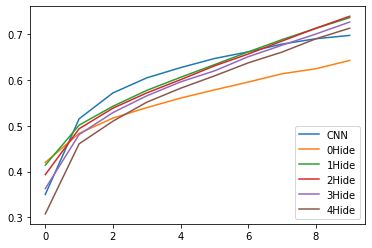

In [48]:
import matplotlib.pyplot as plt
plt.plot(all_acc_1)
plt.plot(all_acc_2)
plt.plot(all_acc_3)
plt.plot(all_acc_4)
plt.plot(all_acc_5)
plt.plot(all_acc_6)
plt.legend(['CNN','0Hide','1Hide','2Hide','3Hide','4Hide'])

Let’s quickly save our trained model:

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [50]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


net_7 = Net()
net_7 = net_7.to ('cuda')


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_7.parameters(), lr=0.001, momentum=0.9)



all_acc_7 = []
for epoch in range(10):  
    net_7.to('cuda')
    net_7.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net_7(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
            
    net_7.eval()
    net_7.cpu()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net_7(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    all_acc_7.append(acc)
    print(f'{epoch + 1}th Accuracy: {100 * correct // total} %')
print('Finished Training')


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


1th Accuracy: 10 %
2th Accuracy: 10 %
3th Accuracy: 10 %
4th Accuracy: 10 %
5th Accuracy: 10 %
6th Accuracy: 10 %
7th Accuracy: 10 %
8th Accuracy: 10 %
9th Accuracy: 20 %
10th Accuracy: 22 %
Finished Training


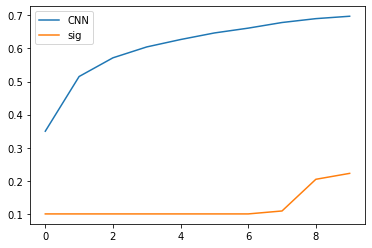

In [51]:
plt.plot(all_acc_1)
plt.plot(all_acc_7)
plt.legend(['CNN','sig'])

In [53]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_1 = Net()
net_1 = net_1.to ('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_1.parameters(), lr=0.001, momentum=0.9)

all_acc_1 = []
train_acc_1 = []
for epoch in range(10):  
    net_1.to('cuda')
    net_1.train()
    running_loss = 0.0
    train_accs=[]
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')

       
        optimizer.zero_grad()

       
        outputs = net_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        accs = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        train_accs.append(accs)
    train_acc = sum(train_accs) / len(train_accs)
    train_acc_1.append(train_acc.cpu().item())
            
    net_1.eval()
    net_1.cpu()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net_1(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    all_acc_1.append(acc)
print('Finished Training')

Finished Training


In [55]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(p=0.3)

    def forward(self, x):
        x = self.dropout(self.pool(F.relu(self.conv1(x))))
        x = self.dropout(self.pool(F.relu(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


net_8 = Net()
net_8 = net_8.to ('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_8.parameters(), lr=0.001, momentum=0.9)

all_acc_8 = []
train_acc_2 = []
for epoch in range(15):  
    net_8.to('cuda')
    net_8.train()
    running_loss = 0.0
    train_accs=[]
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')

        optimizer.zero_grad()

        outputs = net_8(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        accs = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        train_accs.append(accs)
    train_acc = sum(train_accs) / len(train_accs)
    train_acc_2.append(train_acc.cpu().item())
            
    net_8.eval()
    net_8.cpu()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net_8(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    all_acc_8.append(acc)
print('Finished Training')

Finished Training


In [56]:

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.AutoAugment(transforms.AutoAugmentPolicy.CIFAR10),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))],)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [57]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_9 = Net()
net_9 = net_9.to ('cuda')


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_9.parameters(), lr=0.001, momentum=0.9)

all_acc_9 = []
train_acc_3 = []
for epoch in range(15):  
    net_9.to('cuda')
    net_9.train()
    running_loss = 0.0
    train_accs=[]
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')

        optimizer.zero_grad()

        outputs = net_9(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        accs = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        train_accs.append(accs)
    train_acc = sum(train_accs) / len(train_accs)
    train_acc_3.append(train_acc.cpu().item())
            
    net_9.eval()
    net_9.cpu()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net_9(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    all_acc_9.append(acc)
    
print('Finished Training')

Finished Training


In [58]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(p=0.3)

    def forward(self, x):
        x = self.dropout(self.pool(F.relu(self.conv1(x))))
        x = self.dropout(self.pool(F.relu(self.conv2(x))))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


net_10 = Net()
net_10 = net_10.to ('cuda')


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_10.parameters(), lr=0.001, momentum=0.9)

all_acc_10 = []
train_acc_4 = []
for epoch in range(10): 
    net_10.to('cuda')
    net_10.train()
    running_loss = 0.0
    train_accs=[]
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs=inputs.to('cuda')
        labels=labels.to('cuda')

        optimizer.zero_grad()

        outputs = net_10(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        accs = (outputs.argmax(dim=-1) == labels.to('cuda')).float().mean()
        train_accs.append(accs)
    train_acc = sum(train_accs) / len(train_accs)
    train_acc_2.append(train_acc.cpu().item())
            
    net_10.eval()
    net_10.cpu()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net_8(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    all_acc_10.append(acc)
print('Finished Training')

Finished Training


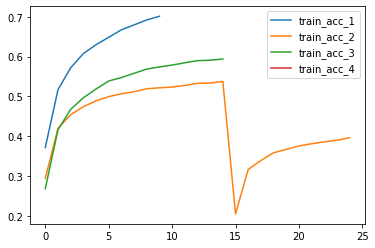

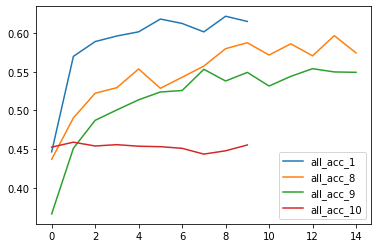

In [59]:
plt.plot(train_acc_1)
plt.plot(train_acc_2)
plt.plot(train_acc_3)
plt.plot(train_acc_4)
plt.legend(['train_acc_1','train_acc_2','train_acc_3','train_acc_4'])
plt.show()

plt.plot(all_acc_1)
plt.plot(all_acc_8)
plt.plot(all_acc_9)
plt.plot(all_acc_10)

plt.legend(['all_acc_1','all_acc_8','all_acc_9','all_acc_10'])